### Problem Statement: 

### To build a multi-headed model that’s capable of detecting different types of toxicity like threats, obscenity, insults, and identity-based hate.

We try to identify whether a comment is toxic or not. A toxic comment is a comment that contains inappropriate or harmful language. For example, a comment that insults someone, threatens them, or makes them feel bad about themselves is a toxic comment.

We are going to use a type of artificial intelligence called "deep learning" to identify toxic comments. 
Specifically, we will create two models called "LSTM" and "LSTM-CNN" to make predictions.

In [1]:
# Here, we are importing the necessary libraries and modules. 
# These libraries include Pandas (for data manipulation), NumPy (for numerical operations), 
# and Keras (for building the deep learning models). We import several Keras layers 
# and models that we will use later in the code to build the LSTM and LSTM-CNN models.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Input, Dropout, Activation, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping

2023-02-22 08:22:57.730019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/preprocessing/sequence.py)

In [2]:
# https://www.kaggle.com/competitions/jigsaw-multilingual-toxic-comment-classification/data
# Here, we are loading the dataset we will use to train and test the models. 
# The dataset is a CSV file named 'jigsaw-toxic-comment-train-processed-seqlen128.csv'.

df = pd.read_csv("/Users/sarju/Desktop/Projects_2023/Toxic_Comment_Classification/jigsaw-toxic-comment-train-processed-seqlen128.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
# checking if null values are present or not

df.isnull().sum()

id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
input_word_ids    0
input_mask        0
all_segment_id    0
dtype: int64

In [5]:
df['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [6]:
df['toxic'].head()

0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64

In [8]:
df.toxic.unique()

array([0, 1])

In [9]:
X = df['comment_text'].values
y = df['toxic'].values

In [14]:
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=128)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from keras.layers import *
from keras.models import *

# LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

history_lstm = model_lstm.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
2236/2236 [==============================] - 327s 146ms/step - loss: 0.1560 - accuracy: 0.9446 - val_loss: 0.1217 - val_accuracy: 0.9555
Epoch 2/5
2236/2236 [==============================] - 335s 150ms/step - loss: 0.1122 - accuracy: 0.9567 - val_loss: 0.1136 - val_accuracy: 0.9570
Epoch 3/5
2236/2236 [==============================] - 374s 167ms/step - loss: 0.0975 - accuracy: 0.9616 - val_loss: 0.1176 - val_accuracy: 0.9557
Epoch 4/5
2236/2236 [==============================] - 354s 158ms/step - loss: 0.0820 - accuracy: 0.9676 - val_loss: 0.1389 - val_accuracy: 0.9536
Epoch 5/5
2236/2236 [==============================] - 373s 167ms/step - loss: 0.0670 - accuracy: 0.9731 - val_loss: 0.1541 - val_accuracy: 0.9516


In [26]:
lstm_scores = model_lstm.evaluate(X_test, y_test)
print("LSTM test accuracy:", lstm_scores[1])

1398/1398 [==============================] - 39s 28ms/step - loss: 0.1572 - accuracy: 0.9511
LSTM test accuracy: 0.9510847926139832


In [27]:
# LSTM-CNN model
inputs = Input(shape=(128,))
x = Embedding(input_dim=10000, output_dim=128, input_length=128)(inputs)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = LSTM(128)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_lstm_cnn = Model(inputs=inputs, outputs=outputs)
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
# Train the model
history_lstm_cnn = model_lstm_cnn.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
2236/2236 [==============================] - 161s 71ms/step - loss: 0.1482 - accuracy: 0.9471 - val_loss: 0.1176 - val_accuracy: 0.9566
Epoch 2/5
2236/2236 [==============================] - 188s 84ms/step - loss: 0.1056 - accuracy: 0.9595 - val_loss: 0.1142 - val_accuracy: 0.9567
Epoch 3/5
2236/2236 [==============================] - 208s 93ms/step - loss: 0.0804 - accuracy: 0.9689 - val_loss: 0.1305 - val_accuracy: 0.9533
Epoch 4/5
2236/2236 [==============================] - 212s 95ms/step - loss: 0.0514 - accuracy: 0.9803 - val_loss: 0.1720 - val_accuracy: 0.9494
Epoch 5/5
2236/2236 [==============================] - 237s 106ms/step - loss: 0.0309 - accuracy: 0.9888 - val_loss: 0.2428 - val_accuracy: 0.9432


In [31]:
lstm_cnn_scores = model_lstm_cnn.evaluate(X_test, y_test)
print("LSTM-CNN test accuracy:", lstm_cnn_scores[1])


1398/1398 [==============================] - 15s 10ms/step - loss: 0.2489 - accuracy: 0.9437
LSTM-CNN test accuracy: 0.9436591267585754


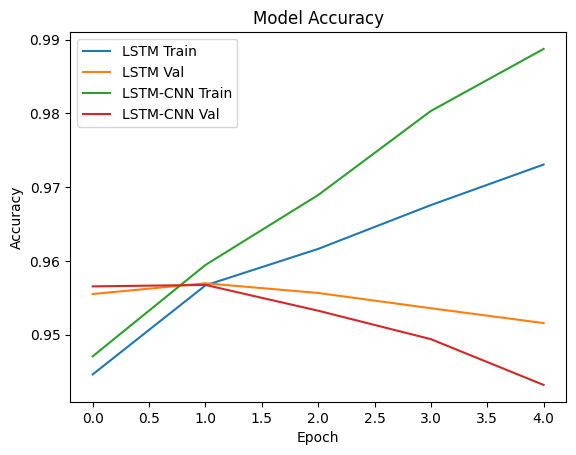

In [32]:
# Plot training history
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.plot(history_lstm_cnn.history['accuracy'])
plt.plot(history_lstm_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val', 'LSTM-CNN Train', 'LSTM-CNN Val'], loc='upper left')
plt.show()

In [33]:
comment = "Sam is a good boy"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm = model_lstm.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm[0][0]>0.5 else 'No')


1/1 [==============================] - 1s 549ms/step
Toxic: No


In [34]:
comment = "Get the hell out of here!"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm = model_lstm.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm[0][0]>0.5 else 'No')


1/1 [==============================] - 0s 28ms/step
Toxic: No


In [35]:
comment = "Nobody is going to talk with you because you are a liar"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm = model_lstm.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm[0][0]>0.5 else 'No')


1/1 [==============================] - 0s 23ms/step
Toxic: Yes


In [ ]:
# checking the lstm_cnn model with the help of an example

In [37]:
comment = "Don't try to act smart"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm_cnn = model_lstm_cnn.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm_cnn[0][0]>0.5 else 'No')

1/1 [==============================] - 0s 394ms/step
Toxic: No


In [39]:
comment = "Get the hell out of here"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm_cnn = model_lstm_cnn.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm_cnn[0][0]>0.5 else 'No')

1/1 [==============================] - 0s 18ms/step
Toxic: Yes


In [40]:
comment = "I will not let you die, trust me"
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)

pred_lstm_cnn = model_lstm_cnn.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm_cnn[0][0]>0.5 else 'No')

1/1 [==============================] - 0s 21ms/step
Toxic: No


In [42]:
comment = "I will kill you..."
comment_seq = tokenizer.texts_to_sequences([comment])
comment_seq = pad_sequences(comment_seq, maxlen=128)
x
pred_lstm_cnn = model_lstm_cnn.predict(comment_seq)

print('Toxic:', 'Yes' if pred_lstm_cnn[0][0]>0.5 else 'No')

1/1 [==============================] - 0s 19ms/step
Toxic: Yes
